In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy


import seaborn as sns
from sklearn.metrics import confusion_matrix

from IPython.display import display, Math, Latex

import nn

# Part 2: Multinomial NN with Softmax, Categorical Cross Entropy, and One-Hot Encoding
## Problem 7

### Create Dataset
The data is meant to be RGB pairs, and the network has the task of sorting into red, green, blue, and black

In [2]:
data = pd.read_csv("A2B_Data_EliWeissler.csv")
data

,R,G,B,LABEL
0,0,255,0,green
1,39,234,32,green
2,27,233,21,green
3,40,241,31,green
4,19,210,32,green
5,255,0,0,red
6,229,31,21,red
7,232,9,9,red
8,238,21,34,red
9,255,10,18,red


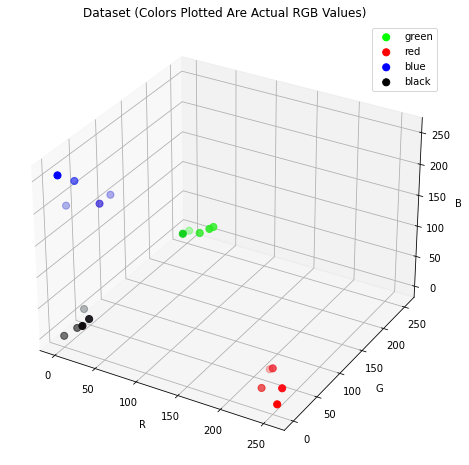

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
fig.set_size_inches((8,8))
# Plotting
for i in ["green", "red", "blue", "black"]:
    data_subset = data[data["LABEL"] == i]
    ax.scatter(data_subset["R"], data_subset["G"], data_subset["B"],
               s=50, c=data_subset[["R", "G", "B"]].values/255, label=i)
ax.set_title('Dataset (Colors Plotted Are Actual RGB Values)')
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
ax.legend()
plt.show()

### Create X and Y

In [4]:
X, Y = nn.normalize_data(data, OHE=True)
Math("X = " + sy.latex(sy.Matrix(np.round(X, 2))) +\
     "\quad Y = " + sy.latex(sy.Matrix(Y)))

<IPython.core.display.Math object>

### Build the network and verify that we are handling the softmax Jacobian correctly:

In [5]:
# Initialize network
input_size = 3
hidden_layers = [2]
output_size = 4
activation_fns = [nn.ReLU, nn.softmax]
loss_fn = nn.loss_CCE
random_initialize = True
network = nn.NeuralNetwork(input_size, output_size, hidden_layers,
                        activation_fns, loss_fn, random_initialize=random_initialize)

In [6]:
# Do the machinations needed to get dL/dz2
X_subset = X[0]
Y_subset = Y[0]
pred = network.feed_forward(X_subset)
network.calc_jacobian()
network.back_propagate(X_subset, Y_subset, pred, lr=1)

In [7]:
network.dLdz[1]

array([-0.8324437 ,  0.18753036,  0.44529529,  0.19961804])

In [8]:
pred-Y_subset

array([[-0.8324437 ,  0.18753036,  0.44529529,  0.19961804]])

Yay it's calculating it correctly!

### Now try actually training:

In [9]:
# Initialize network
input_size = 3
hidden_layers = [2]
output_size = 4
activation_fns = [nn.ReLU, nn.softmax]
loss_fn = nn.loss_CCE
random_initialize = True
network = nn.NeuralNetwork(input_size, output_size, hidden_layers,
                        activation_fns, loss_fn, random_initialize=random_initialize)
# Train network
epochs = 1000
lr = 1
batch_size = 9
loss = network.train(X, Y, X, Y, epochs=epochs, lr=lr, batch_size=batch_size, check_progress=150)

Epoch 0 (out of 1000) -- Loss: 2.1901
Epoch 150 (out of 1000) -- Loss: 1.6439
Epoch 300 (out of 1000) -- Loss: 1.2229
Epoch 450 (out of 1000) -- Loss: 0.9065
Epoch 600 (out of 1000) -- Loss: 0.935
Epoch 750 (out of 1000) -- Loss: 0.8934
Epoch 900 (out of 1000) -- Loss: 0.8929


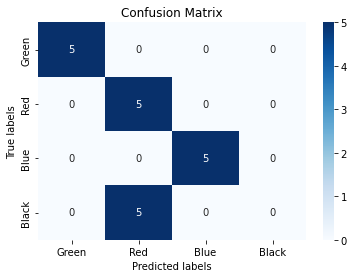

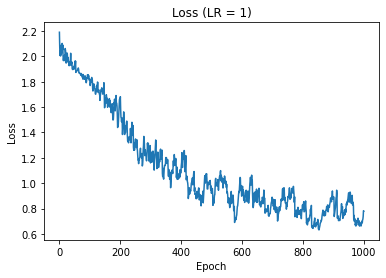

In [10]:
# Predict and plot
pred = network.feed_forward(X)
nn.plot_confusion_matrix(Y, pred, labels=["Green", "Red", "Blue", "Black"])
nn.plot_loss(loss, lr)

We're correctly predicting three of the colors after 1000 epochs, but we are missing black. So try training longer to see if we can get past that. This will continue where the last training left off:

In [11]:
# Train network
epochs = 10000
lr = 0.2
batch_size = 9
loss = network.train(X, Y, X, Y, epochs=epochs, lr=lr, batch_size=batch_size, check_progress=1000)

Epoch 0 (out of 10000) -- Loss: 0.7807


Epoch 1000 (out of 10000) -- Loss: 0.7617
Epoch 2000 (out of 10000) -- Loss: 0.7643
Epoch 3000 (out of 10000) -- Loss: 0.6989
Epoch 4000 (out of 10000) -- Loss: 0.7403
Epoch 5000 (out of 10000) -- Loss: 0.6674
Epoch 6000 (out of 10000) -- Loss: 0.6696
Epoch 7000 (out of 10000) -- Loss: 0.654
Epoch 8000 (out of 10000) -- Loss: 0.4533
Epoch 9000 (out of 10000) -- Loss: 0.2773


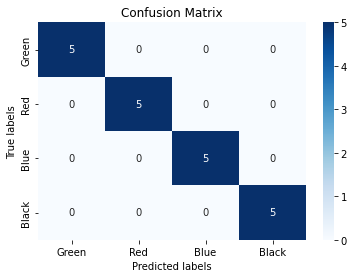

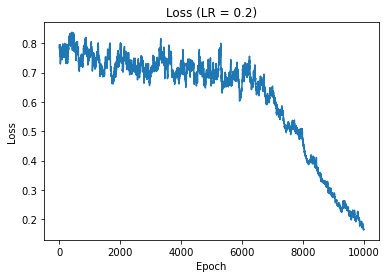

In [12]:
# Predict and plot
pred = network.feed_forward(X)
nn.plot_confusion_matrix(Y, pred, labels=["Green", "Red", "Blue", "Black"])
nn.plot_loss(loss, lr)

Yay we got off of the plataeu! Instead of training the network longer, we could have also restarted with a different random initial guess for weights/biases, and that may have also gotten us to where we wanted to go!